<a href="https://colab.research.google.com/github/mohitphulsunge/DataScience-MachineLearning/blob/main/Regularized_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as opt 

Import dataset

In [ ]:
dataset = pd.read_csv("ex2data2.txt", header=None)
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:, -1].values.reshape(len(X), 1)
Y.shape

(118, 1)

Visualize

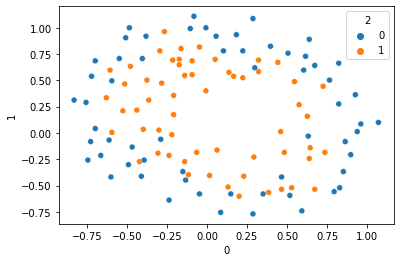

In [ ]:
sns.scatterplot(x=dataset[0], y=dataset[1], hue=dataset[2], data=dataset)
# x = np.linspace(5,25,100)
# y = (-22.21660051 + 0.1826898*x)/(-0.17763707)
# plt.plot(x, y, '-r')
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))

Fetaure Map

In [ ]:
def featureMap(X1, X2, degree):
    arr = np.ones(len(X1)).reshape(len(X1), 1)
    for i in range(1, degree+1):
        for j in range(i+1):
            arrColToAdd = (X1**j)*(X2**(i-j))
            arr = np.concatenate((arr, arrColToAdd), axis=1) 
    return arr

# for i in range(7):
#     print("For : " , i)
#     for j in range(i + 1):
#         print(j, i-j)

X = featureMap(X[:, 0].reshape(len(X), 1), X[:, 1].reshape(len(X), 1), 6)

Sigmoid Function

In [ ]:
def sigmoid(X):
    return 1/(1 + np.exp(-X))

Regularized cost function

In [ ]:
def lrCostFunction(theta_t, X_t, y_t, lambda_t):
    m = len(y_t)
    J = (-1/m) * (y_t.T @ np.log(sigmoid(X_t @ theta_t)) + (1 - y_t.T) @ np.log(1 - sigmoid(X_t @ theta_t)))
    reg = (lambda_t/(2*m)) * (theta_t[1:].T @ theta_t[1:])
    J = J + reg
    return J

gradient

In [ ]:
def gradient(theta, X, y, lambda_t):
    grad = np.zeros((len(X),1))
    grad = (1/len(X))*(np.dot((sigmoid(np.dot(X,theta)) - Y).T, X)).reshape(len(X), 1)
    grad[1:] = grad[1:] + (lambda_t / m) * theta[1:]
    return grad

def lrGradientDescent(theta, X, y, lambda_t):
    m = len(y)
    grad = np.zeros([m,1])
    grad = (1/m) * X.T @ (sigmoid(X @ theta) - y)
    grad[1:] = grad[1:] + (lambda_t / m) * theta[1:]
    return grad

Initialize params

In [ ]:

theta = np.zeros(28).reshape(28,1)

Test cost function

In [ ]:
print(cost(X,Y,theta, 0))
# np.insert(theta[1:], 0, 0).shape

0.6931471805599451


In [ ]:
lam=1
output = opt.fmin_tnc(func = lrCostFunction, x0 = theta.flatten(), fprime = lrGradientDescent, \
                         args = (X, Y.flatten(), lam))
theta = output[0]
print(theta) # theta contains the optimized values

[ 1.27271026  1.18111686  0.62529964 -1.43166927 -0.9174319  -2.01987399
 -0.17516292 -0.35725404 -0.36553118  0.12393228 -1.19271299 -0.27469165
 -0.61558556 -0.05098418 -1.45817009 -0.45645981 -0.29539514 -0.27778949
 -0.04466178 -0.20603301 -0.24217841 -0.92467488 -0.1438915  -0.32742404
  0.0155576  -0.29244867  0.02779373 -1.04319154]


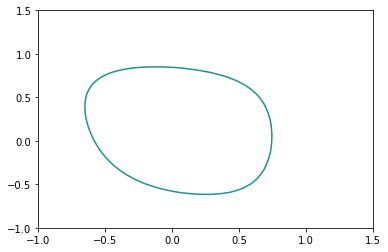

In [ ]:
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))
def mapFeatureForPlotting(X1, X2):
    degree = 6
    out = np.ones(1)
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j), np.power(X2, j))))
    return out
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(mapFeatureForPlotting(u[i], v[j]), theta)
# mask = Y.flatten() == 1
# X = dataset.iloc[:,:-1]
# passed = plt.scatter(X[mask][0], X[mask][1])
# failed = plt.scatter(X[~mask][0], X[~mask][1])
plt.contour(u,v,z,0)
# plt.xlabel('Microchip Test1')
# plt.ylabel('Microchip Test2')
# plt.legend((passed, failed), ('Passed', 'Failed'))
plt.show()